In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split as tts
import numpy as np

data=pd.read_csv('data.csv')
data.drop(data.columns[0], axis=1, inplace=True)
diagnosis_mapper={'M' :1, 'B' :0}
data['diagnosis']=data['diagnosis'].map(diagnosis_mapper)
X=data.iloc[:,1:]
Y=data.iloc[:,0]
y=Y.to_numpy()

In [ ]:
def remove_correlated_variables(X):
  cov=X.corr()
  length=X.shape[1]

  drop_column_list=np.full(cov.shape[1],False,dtype=bool)
  for i in range (length):
    for j in range (i+1,length):
      if (cov.iloc[i,j]>.9):
        drop_column_list[j]=True

  columns_to_be_dropped=X.columns[drop_column_list]
  X.drop(columns_to_be_dropped, axis=1, inplace=True)
  return X
after_cor_rmv=remove_correlated_variables(X)
print(X.shape[1])


20


In [ ]:
import statsmodels.api as sm

def remove_less_significant_features(X, Y):
  sl = 0.05
  regression_ols = None
  columns_dropped = np.array([])
  for itr in range(0, (X.shape[1])):
    regression_ols = sm.OLS(Y, X).fit()
    max_col = regression_ols.pvalues.idxmax()
    max_val = regression_ols.pvalues.max()
    print(max_col)
    if max_val > sl:
      X.drop(max_col, axis=1, inplace=True)
      columns_dropped = np.append(columns_dropped, [max_col])
    else:
      break
  regression_ols.summary()
  return X

final_data=remove_less_significant_features(after_cor_rmv,Y)
final_data.head()


In [ ]:
import math
def calculate_sigmoid(hypothesis):
  return (1/(1+ math.e**(-hypothesis)))


In [ ]:
def calculate_hypothesis(theta,x,i):
  h_theta = np.dot(theta,x[i])
  a = calculate_sigmoid(h_theta)
  return a

In [ ]:
j=0
list_=np.zeros((final_data.shape[0],final_data.shape[1]))
for col in final_data.columns:
  list_[:,j]=final_data[col]
  j+=1
print(list_)

In [ ]:
def normalize_data_with_bias(list_):
  N = list_.shape[0]
  mu = np.mean(list_, axis=0)
  sigma = np.std(list_,axis=0)

  mu_vector =  np.expand_dims(mu, axis=0)
  sigma_vector = np.expand_dims(sigma, axis=0)

  ndim_mu = np.repeat(mu_vector, N, axis=0)
  ndim_sigma = np.repeat(sigma_vector, N, axis=0)

  normalized_list = (list_ -  ndim_mu)/ ndim_sigma
  bias = np.ones((list_.shape[0],1))

  normalized_data_with_bias = np.append(bias,normalized_list, axis=1)
  
  return mu_vector, sigma_vector, normalized_data_with_bias

mean, sd, data_= normalize_data_with_bias(list_)


In [ ]:
def calculate_cost(X_train, y_train, theta):
  N=X_train.shape[0]
  cost=0

  for i in range (N):
    prediction = calculate_hypothesis(theta, X_train, i)
    label = y_train[i]
    cost += -(y_train[i]*np.log(prediction + .0001)+(1-y_train[i])*np.log(1-prediction +.0001))
  cost /= N

  return cost

In [ ]:
def gradient_descent(X_train, y_train, theta, max_iteration, alpha):

  cost_vector=np.array([], dtype=np.float32)

  length_of_data = X_train.shape[0]
  length_of_theta = len(theta)

  sum_over_del_j_theta_d_theta_k = np.zeros(length_of_theta)

  for iteration in range (max_iteration):

    J = calculate_cost(X_train, y_train, theta)
    cost_vector = np.append(cost_vector,J)

    for i in range (length_of_data):
      a = calculate_hypothesis(theta, X_train, i)
      
      for k in range (length_of_theta):
        sum_over_del_j_theta_d_theta_k[k] += (a - y_train[i])*X_train[i][k]

      for j in range (length_of_theta):
        theta[j] = theta[j] - (alpha / length_of_data) * sum_over_del_j_theta_d_theta_k[j]

  plot_cost(cost_vector)
  return theta


In [ ]:
import matplotlib.pyplot as plt

def plot_cost(cost_vector):
  fig, axis= plt.subplots()
  axis.set_xlabel('Iteration')
  axis.set_ylabel('cost')
  plt.plot(cost_vector)

In [ ]:
def labelling(output):
  if output >= 0.5:
    return 1
  return 0

*********************************************************
*********************************************************
*********************************************************
accuracy on test dataset: 0.9758241758241758
recall on test dataset: 0.9467455621301775
precision on test dataset: 0.9467455621301775
*********************************************************
*********************************************************
*********************************************************
accuracy on test dataset: 0.9824561403508771
recall on test dataset: 0.9767441860465116
precision on test dataset: 0.9767441860465116


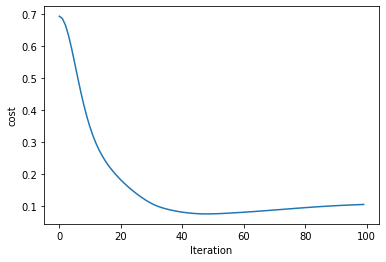

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
theta = np.zeros(data_.shape[1])

X_train, X_test, y_train, y_test = tts(data_, y, test_size=0.2, random_state=42)
theta_final=gradient_descent(X_train, y_train, theta, 100, .00005)

y_train_predicted = np.array([])
for i in range(X_train.shape[0]):
    yp = labelling(np.dot(X_train[i], theta_final))
    y_train_predicted = np.append(y_train_predicted, yp)
    
print("*********************************************************")
print("*********************************************************")
print("*********************************************************")

print("accuracy on test dataset: {}".format(accuracy_score(y_train, y_train_predicted)))
print("recall on test dataset: {}".format(recall_score(y_train, y_train_predicted)))
print("precision on test dataset: {}".format(recall_score(y_train, y_train_predicted)))

print("*********************************************************")
print("*********************************************************")
print("*********************************************************")

y_test_predicted = np.array([])
for i in range(X_test.shape[0]):
    yp = labelling(np.dot(X_test[i], theta_final))
    y_test_predicted = np.append(y_test_predicted, yp)

print("accuracy on test dataset: {}".format(accuracy_score(y_test, y_test_predicted)))
print("recall on test dataset: {}".format(recall_score(y_test, y_test_predicted)))
print("precision on test dataset: {}".format(recall_score(y_test, y_test_predicted)))